# Understanding the SVD

In [1]:
import numpy as np

### Useful reference

- [A Singularly Valuable Decomposition](https://datajobs.com/data-science-repo/SVD-[Dan-Kalman].pdf)

## Sketch of lecture

### Singular value decomposition

Our goal is to understand the following forms of the SVD.

$$
A = U \Sigma V^T
$$

$$
A = \begin{bmatrix}
U_1 & U_2
\end{bmatrix}\begin{bmatrix}
\Sigma_1 & 0 \\
0 & 0 
\end{bmatrix}\begin{bmatrix}
V_1^T \\
V_2^T
\end{bmatrix}
$$

$$
A = \sum_{i=1}^r \sigma u_i v_i^T
$$

### (1) The matrix A

#### What does a matrix do?

A linear function is one that satisfies the property that

$$
f(a_1x_1 + a_2x_2 + \cdots + a_nx_n) = a_1 f(x_1) + a_2 f(x_2) + \ldots + a_n f(x_n)
$$

Let $f(x) = Ax$, where $A$ is a matrix and $x$ is a vector. You can check that the matrix $A$ fulfills the property of being a linear function. If $A$ is $m \times n$, then it is a linear map from $\mathbb{R}^n \mapsto \mathbb{R}^m$.

Let's consider: what does a matrix *do* to a vector?  Matrix multiplication has a *geometric* interpretation.  When we multiply a vector, we either rotate, reflect, dilate or some combination of those three. So multiplying by a matrix *transforms* one vector into another vector.  This is known as a *linear transformation*.

Important Facts: 

* Any matrix defines a linear transformation
* The matrix form of a linear transformation is NOT unique
* We need only define a transformation by saying what it does to a *basis*

Suppose we have a matrix $A$ that defines some transformation.  We can take any invertible matrix $B$ and

$$BAB^{-1}$$

defines the same transformation.  This operation is called a *change of basis*, because we are simply expressing the transformation with respect to a different basis.

**Example**

Let $f(x)$ be the linear transformation that takes $e_1=(1,0)$ to $f(e_1)=(2,3)$ and $e_2=(0,1)$ to $f(e_2) = (1,1)$.  A matrix representation of $f$ would be given by:

$$A = \left(\begin{matrix}2 & 1\\3&1\end{matrix}\right)$$

This is the matrix we use if we consider the vectors of $\mathbb{R}^2$ to be linear combinations of the form 

$$c_1 e_1 + c_2 e_2$$

Now, consider a second pair of (linearly independent) vectors in $\mathbb{R}^2$, say $v_1=(1,3)$ and $v_2=(4,1)$. We first find the transformation that takes $e_1$ to $v_1$ and $e_2$ to $v_2$.  A matrix representation for this is:

$$B = \left(\begin{matrix}1 & 4\\3&1\end{matrix}\right)$$

Our original transformation $f$ can be expressed with respect to the basis $v_1, v_2$ via

$$B^{-1}AB$$

#### Fundamental subspaces of $A$

- Span and basis
- Inner and outer products of vectors
- Rank of outer product is 1
- $C(A)$, $N(A)$, $(C(A^T))$ and $N(A^T)$ mean
- Dimensions of each space and its rank
- How to find a basis for each subspace given a $m \times n$ matrix $A$
- Sketch the diagram relating the four fundamental subspaces

### (2) Orthogonal matrices $U$ and $V^T$

- Orthogonal (perpendicular) vectors
- Orthonormal vectors
- Orthogonal matrix
- $Q^TQ = QQ^T = I$
- Orthogonal matrices are rotations (and reflections)
- Orthogonal matrices preserve norms (lengths)
- 2D orthogonal matrix is a rotation matrix
$$ V = 
\begin{bmatrix}
\cos\theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{bmatrix}
$$
- $V^T$ rotates the perpendicular frame spanned by $V$ into the standard frame spanned by $e_i$
- $V$ rotates the standard frame into the frame spanned by $V$
- 
$$\text{proj}_v x = \frac{\langle x, v \rangle}{\langle v, v \rangle} v
$$
- Matrix form
$$
P = \frac{vv^T}{v^Tv}
$$
- Gram-Schmidt for converting $A$ into an orthogonal matrix $Q$
- QR decomposition

### (3) Diagonal matrix $S$

- Recall that a matrix $A$ is a transform with respect to some basis
- It is desirable to find the simplest similar matrix $B$ in some other basis
- $A$ and $B$ represent the exact same linear transform, just in different coordinate systems
- $Av = \lambda v$ defines the eigenvectors and eigenvalues of $A$
- When a square matrix $A$ is real, symmetric and has all non-negative eigenvalues, it has an eigen-space decomposition (ESD) 
$$ 
A = V \Lambda V^T
$$
where $V$ is orthogonal and $\Lambda$ is diagonal
- The columns of $V$ are formed from the eigenvectors of $A$
- The diagonals of $\Lambda$ are the eigenvalues of $A$ (arrange from large to small in absolute value)

## (4) SVD $U\Sigma V^T$

- The SVD is a generalization of ESD for general $m \times n$ matrices $A$
- If $A$ is $(m \times n)$, we cannot perform an ESD
- $A^TA$ is diagonalizable (note this is the dot product of all pairs of column vectors in $A$)
- 
$$
A^TA = V \Lambda V^T
$$
- Let $\Lambda = \Sigma^2$
- Let $U = AV\Sigma^{-1}$
- The $A = U\Sigma V^T$
- Show $U$ is orthogonal
- Show $U$ is formed from eigenvectors of $AA^T$
- Geometric interpretation of SVD
    - rotate orthogonal frame $V$ onto standard frame
    - scale by $\Sigma$
    - rotate standard frame into orthogonal frame $U$

### Covariance, PCA and SVD

Remember the formula for covariance

$$
\text{Cov}(X, Y) = \frac{\sum_{i=1}^n(X_i - \bar{X})(Y_i - \bar{Y})}{n-1}
$$

where $\text{Cov}(X, X)$ is the sample variance of $X$.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la

In [3]:
np.set_printoptions(precision=3)

In [4]:
def cov(x, y):
    """Returns covariance of vectors x and y)."""
    xbar = x.mean()
    ybar = y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

In [5]:
X = np.random.random(10)
Y = np.random.random(10)

In [6]:
np.array([[cov(X, X), cov(X, Y)], [cov(Y, X), cov(Y,Y)]])

array([[0.08 , 0.031],
       [0.031, 0.108]])

Using `numpy` function

In [7]:
np.cov(X, Y)

array([[0.08 , 0.031],
       [0.031, 0.108]])

In [8]:
Z = np.random.random(10)
np.cov([X, Y, Z])

array([[ 0.08 ,  0.031, -0.021],
       [ 0.031,  0.108, -0.046],
       [-0.021, -0.046,  0.072]])

#### Eigendecomposition of the covariance matrix

In [9]:
mu = [0,0]
sigma = [[0.6,0.2],[0.2,0.2]]
n = 1000
x = np.random.multivariate_normal(mu, sigma, n).T

In [10]:
A = np.cov(x)

In [11]:
m = np.array([[1,2,3],[6,5,4]])
ms = m - m.mean(1).reshape(2,1)
np.dot(ms, ms.T)/2

array([[ 1., -1.],
       [-1.,  1.]])

In [12]:
e, v = la.eigh(A)

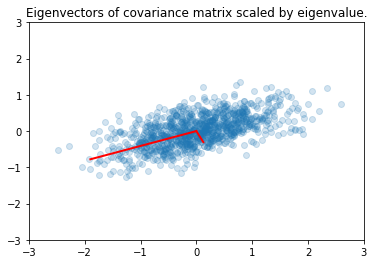

In [13]:
plt.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e, v.T):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3])
plt.title('Eigenvectors of covariance matrix scaled by eigenvalue.');

### PCA

Principal Components Analysis (PCA) basically means to find and rank all the eigenvalues and eigenvectors of a covariance matrix. This is useful because high-dimensional data (with $p$ features) may have nearly all their variation in a small number of dimensions $k$, i.e. in the subspace spanned by the eigenvectors of the covariance matrix that have the $k$ largest eigenvalues. If we project the original data into this subspace, we can have a dimension reduction (from $p$ to $k$) with hopefully little loss of information.

Numerically, PCA is typically done using SVD on the data matrix rather than eigendecomposition on the covariance matrix. The next section explains why this works. Numerically, the condition number for working with the covariance matrix directly is the square of the condition number using SVD, so SVD minimizes errors.

For zero-centered vectors,

\begin{align}
\text{Cov}(X, Y) &= \frac{\sum_{i=1}^n(X_i - \bar{X})(Y_i - \bar{Y})}{n-1} \\
  &= \frac{\sum_{i=1}^nX_iY_i}{n-1} \\
  &= \frac{XY^T}{n-1}
\end{align}

and so the covariance matrix for a data set X that has zero mean in each feature vector is just $XX^T/(n-1)$. 

In other words, we can also get the eigendecomposition of the covariance matrix from the positive semi-definite matrix $XX^T$.

Note: Here $x$ is a matrix of **row** vectors

In [14]:
X = np.random.random((5,4))
X

array([[0.733, 0.089, 0.616, 0.417],
       [0.801, 0.571, 0.21 , 0.711],
       [0.528, 0.176, 0.991, 0.955],
       [0.579, 0.832, 0.255, 0.216],
       [0.067, 0.206, 0.783, 0.084]])

In [15]:
Y = X - X.mean(1)[:, None]

In [16]:
np.around(Y.mean(1), 5)

array([ 0., -0., -0.,  0.,  0.])

In [17]:
Y

array([[ 0.269, -0.375,  0.152, -0.046],
       [ 0.228, -0.003, -0.363,  0.138],
       [-0.135, -0.486,  0.328,  0.292],
       [ 0.109,  0.362, -0.215, -0.255],
       [-0.218, -0.079,  0.498, -0.201]])

In [18]:
np.cov(X)

array([[ 0.08 ,  0.   ,  0.061, -0.042,  0.019],
       [ 0.   ,  0.067, -0.036,  0.022, -0.086],
       [ 0.061, -0.036,  0.149, -0.112,  0.058],
       [-0.042,  0.022, -0.112,  0.085, -0.036],
       [ 0.019, -0.086,  0.058, -0.036,  0.114]])

In [19]:
np.cov(Y)

array([[ 0.08 ,  0.   ,  0.061, -0.042,  0.019],
       [ 0.   ,  0.067, -0.036,  0.022, -0.086],
       [ 0.061, -0.036,  0.149, -0.112,  0.058],
       [-0.042,  0.022, -0.112,  0.085, -0.036],
       [ 0.019, -0.086,  0.058, -0.036,  0.114]])

In [20]:
e1, v1 = np.linalg.eig(np.dot(x, x.T)/(n-1))

#### Principal components

Principal components are simply the eigenvectors of the covariance matrix used as basis vectors. Each of the original data points is expressed as a linear combination of the principal components, giving rise to a new set of coordinates. 

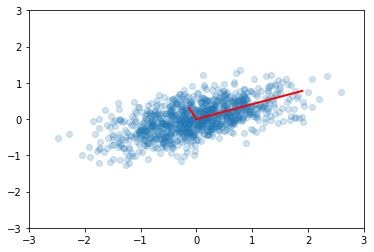

In [21]:
plt.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e1, v1.T):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

#### Change of basis

Suppose we have a vector $u$ in the standard basis $B$ , and a matrix $A$ that maps $u$ to $v$, also in $B$. We can use the eigenvalues of $A$ to form a new basis $B'$. As explained above, to bring a vector $u$ from $B$-space to a vector $u'$ in $B'$-space, we multiply it by $Q^{-1}$, the inverse of the matrix having the eigenvctors as column vectors. Now, in the eigenvector basis, the equivalent operation to $A$ is the diagonal matrix $\Lambda$ - this takes $u'$ to $v'$. Finally, we convert $v'$ back to a vector $v$ in the standard basis by multiplying with $Q$.

![Commuative diagram](figs/spectral.png)

#### We get the principal components by a change of basis

In [22]:
ys = np.dot(v1.T, x)

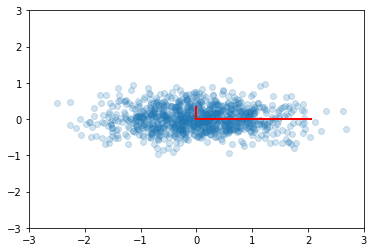

In [23]:
plt.scatter(ys[0,:], ys[1,:], alpha=0.2)
for e_, v_ in zip(e1, np.eye(2)):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

For example, if we only use the first column of `ys`, we will have the projection of the data onto the first principal component, capturing the majority of the variance in the data with a single feature that is a linear combination of the original features.

#### Transform back to original coordinates

We may need to transform the (reduced) data set to the original feature coordinates for interpretation. This is simply another linear transform (matrix multiplication).

In [24]:
zs = np.dot(v1, ys)

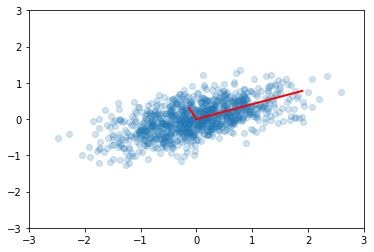

In [25]:
plt.scatter(zs[0,:], zs[1,:], alpha=0.2)
for e_, v_ in zip(e1, v1.T):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

In [26]:
u, s, v = np.linalg.svd(x)
u.dot(u.T)

array([[ 1.000e+00, -5.551e-17],
       [-5.551e-17,  1.000e+00]])

#### Dimension reduction via PCA

We have the spectral decomposition of the covariance matrix

$$
A = Q^{-1}\Lambda Q
$$

Suppose $\Lambda$ is a rank $p$ matrix. To reduce the dimensionality to $k \le p$, we simply set all but the first $k$ values of the diagonal of $\Lambda$ to zero. This is equivalent to ignoring all except the first $k$ principal components.

What does this achieve? Recall that $A$ is a covariance matrix, and the trace of the matrix is the overall variability, since it is the sum of the variances.

In [27]:
A

array([[0.602, 0.201],
       [0.201, 0.193]])

In [28]:
A.trace()

0.7941479443137951

In [29]:
e, v = np.linalg.eigh(A)
D = np.diag(e)
D

array([[0.11 , 0.   ],
       [0.   , 0.684]])

In [30]:
D.trace()

0.7941479443137951

In [31]:
D[0,0]/D.trace()

0.13860574831143427

Since the trace is invariant under change of basis, the total variability is also unchanged by PCA. By keeping only the first $k$ principal components, we can still "explain" $\sum_{i=1}^k e[i]/\sum{e}$ of the total variability. Sometimes, the degree of dimension reduction is specified as keeping enough principal components so that (say) $90\%$ of the total variability is explained.

### Using SVD for PCA

SVD is a decomposition of the data matrix $X = U S V^T$ where $U$ and $V$ are orthogonal matrices and $S$ is a diagonal matrix. 

Recall that the transpose of an orthogonal matrix is also its inverse, so if we multiply on the right by $X^T$, we get the following simplification

\begin{align}
X &= U S V^T \\
X X^T &= U S V^T (U S V^T)^T \\
 &= U S V^T V S U^T \\
 &= U S^2 U^T
\end{align}

Compare with the eigendecomposition of a matrix $A = W \Lambda W^{-1}$, we see that SVD gives us the eigendecomposition of the matrix $XX^T$, which as we have just seen, is basically a scaled version of the covariance for a data matrix with zero mean, with the eigenvectors given by $U$ and eigenvealuse by $S^2$ (scaled by $n-1$)..

In [32]:
u, s, v = np.linalg.svd(x)

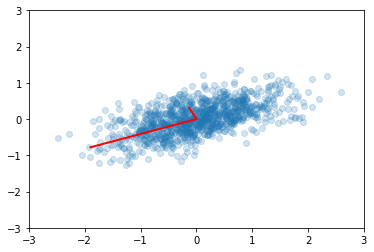

In [33]:
e2 = s**2/(n-1)
v2 = u
plt.scatter(x[0,:], x[1,:], alpha=0.2)
for e_, v_ in zip(e2, v2):
    plt.plot([0, 3*e_*v_[0]], [0, 3*e_*v_[1]], 'r-', lw=2)
plt.axis([-3,3,-3,3]);

In [34]:
v1 # from eigenvectors of covariance matrix

array([[ 0.925, -0.379],
       [ 0.379,  0.925]])

In [35]:
v2 # from SVD

array([[-0.925, -0.379],
       [-0.379,  0.925]])

In [36]:
e1 # from eigenvalues of covariance matrix

array([0.684, 0.11 ])

In [37]:
e2 # from SVD

array([0.684, 0.11 ])